# Importing Packages

In [3]:
#Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

from IPython.display import Image

import os     

from imblearn.over_sampling import SMOTE

from sklearn import tree

from sklearn.model_selection import GridSearchCV

# Data Acquisition

In [4]:
data = pd.read_csv("C:\\Users\\A\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\A\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv'

# Data Analysis

In [3]:

data.shape

(1470, 35)

In [4]:
sum(data.isnull().sum())

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [7]:
y = data.Attrition
X = data.drop(['Attrition'],axis=1)

### Pre-Processing

In [8]:
#We may have to encode the data to proceed further
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
X= X.apply(LabelEncoder().fit_transform)

# Data Split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 34)
(441, 34)
(1029,)
(441,)


# Decision Tree Model Building and Evaluation

In [11]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
dt = DecisionTreeClassifier(random_state=42,criterion='entropy')

In [13]:
dt.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [14]:
prediction = dt.predict(X_test_dt)

In [15]:
print(classification_report(y_test_dt,prediction))

              precision    recall  f1-score   support

          No       0.88      0.88      0.88       380
         Yes       0.27      0.28      0.27        61

    accuracy                           0.79       441
   macro avg       0.57      0.58      0.58       441
weighted avg       0.80      0.79      0.80       441



### Feature Importance and Visualization

In [16]:
class_names = dt.classes_

In [17]:
feature_importance = dt.feature_importances_

In [18]:
fi = dt.feature_importances_

In [19]:
features = X.columns.to_list()

In [20]:
l = len(features)
for i in range(0,len(features)):
    print(features[i],"--->",fi[i])

Age ---> 0.03411082971870425
BusinessTravel ---> 0.023850239995357556
DailyRate ---> 0.035605960821261017
Department ---> 0.012655602347680513
DistanceFromHome ---> 0.0866254553813388
Education ---> 0.0061234315915732465
EducationField ---> 0.015856184899514514
EmployeeCount ---> 0.0
EmployeeNumber ---> 0.08302556415225251
EnvironmentSatisfaction ---> 0.018723658340353395
Gender ---> 0.0
HourlyRate ---> 0.05918339167342364
JobInvolvement ---> 0.03375115345800158
JobLevel ---> 0.004022231106683003
JobRole ---> 0.01831121016170273
JobSatisfaction ---> 0.026620824613507867
MaritalStatus ---> 0.0313128724854894
MonthlyIncome ---> 0.10429239932901205
MonthlyRate ---> 0.04588695925631474
NumCompaniesWorked ---> 0.02928228088112001
Over18 ---> 0.0
OverTime ---> 0.07489226997376557
PercentSalaryHike ---> 0.03679223789574195
PerformanceRating ---> 0.0
RelationshipSatisfaction ---> 0.021597810018795217
StandardHours ---> 0.0
StockOptionLevel ---> 0.02753166664870493
TotalWorkingYears ---> 0.0382

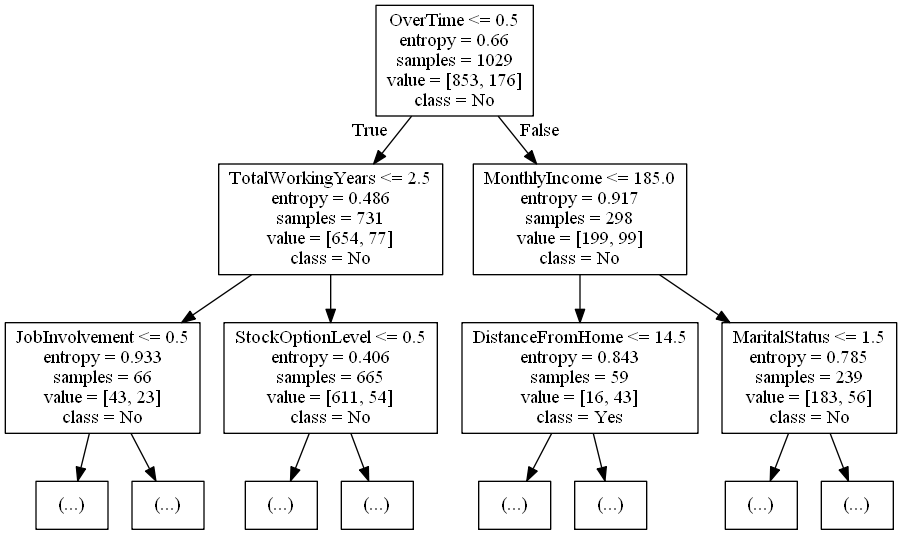

In [21]:
dot_data = tree.export_graphviz(dt,max_depth = 2,class_names=class_names,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Optimization and retrain

In [22]:
# OverSampling the data
X_resampled_sm, y_resampled_sm = SMOTE().fit_sample(X,y)

In [23]:
X_resampled_sm = pd.DataFrame(X_resampled_sm)
y_resampled_sm = pd.DataFrame(y_resampled_sm)

In [24]:
X_train_dt_opt, X_test_dt_opt, y_train_dt_opt, y_test_dt_opt = train_test_split(X_resampled_sm,y_resampled_sm,test_size=0.3,random_state=42)

In [25]:
y_train.rename(columns={0:'Attrition'},inplace=True)
y_test.rename(columns={0:'Attrition'},inplace=True)

1041     No
184      No
1222    Yes
67       No
220      No
494      No
430      No
240      No
218      No
49       No
665      No
926      No
617      No
361      No
1423     No
1244     No
1250     No
752     Yes
271     Yes
1055     No
259     Yes
428      No
1026     No
277      No
1105     No
1116     No
670      No
619      No
1046     No
247      No
       ... 
950      No
1300     No
1165     No
660     Yes
953     Yes
1358     No
199      No
618      No
596      No
680      No
1439     No
1292     No
10       No
147      No
693     Yes
282      No
298      No
590      No
291      No
471      No
575      No
1022     No
754      No
1461    Yes
129      No
1047     No
331      No
323     Yes
654      No
1110    Yes
Length: 441, dtype: object

In [26]:
dt = DecisionTreeClassifier(random_state=42,criterion='entropy')

In [27]:
dt.fit(X_train_dt_opt,y_train_dt_opt)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [28]:
prediction = dt.predict(X_test_dt_opt)

In [29]:
print(classification_report(y_test_dt_opt,prediction))

              precision    recall  f1-score   support

          No       0.87      0.85      0.86       369
         Yes       0.86      0.87      0.87       371

    accuracy                           0.86       740
   macro avg       0.86      0.86      0.86       740
weighted avg       0.86      0.86      0.86       740



# Random Forest Model Building and Evaluation

In [30]:
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
rf = RandomForestClassifier(random_state=42)

In [32]:
rf.fit(X_train_rf,y_train_rf)

C:\Users\A\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
random_forest_predicton = rf.predict(X_test_rf)

In [34]:
print(classification_report(y_test_rf,random_forest_predicton))

              precision    recall  f1-score   support

          No       0.88      0.98      0.93       380
         Yes       0.65      0.18      0.28        61

    accuracy                           0.87       441
   macro avg       0.76      0.58      0.61       441
weighted avg       0.85      0.87      0.84       441



### Feature Importance and Visualization

In [35]:
y_train_grid = pd.factorize(y_train)[0]

In [36]:
param_grid = [
{'n_estimators': [3, 10, 30,50,100], 'max_features': [2, 4, 6, 8,10]}]
forest_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_classifier, param_grid, cv=5)

grid_search.fit(X_train_rf, y_train_grid)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{

In [37]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [38]:
%matplotlib inline

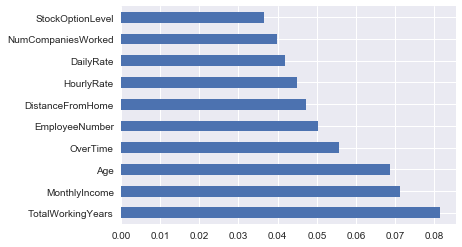

In [39]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Optimization and retrain

###### based on hyper paramter Tuning(by selecting best nuber of trees(estimators) and number of features)

In [40]:
rf = RandomForestClassifier(random_state=42,max_features=8,n_estimators=30)

In [41]:
rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [42]:
prediction = rf.predict(X_test_rf)

In [43]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          No       0.88      0.99      0.93       380
         Yes       0.64      0.15      0.24        61

    accuracy                           0.87       441
   macro avg       0.76      0.57      0.58       441
weighted avg       0.85      0.87      0.83       441



###### Optimization by using Over Sampling Techniques

In [44]:
# OverSampling the data
X_resampled_sm, y_resampled_sm = SMOTE().fit_sample(X,y)

In [45]:
X_resampled_sm = pd.DataFrame(X_resampled_sm)
y_resampled_sm = pd.DataFrame(y_resampled_sm)

In [46]:
from sklearn.model_selection import train_test_split
X_train_rf_opt, X_test_rf_opt, y_train_rf_opt, y_test_rf_opt = train_test_split(X_resampled_sm,y_resampled_sm,test_size=0.3)


In [47]:
y_train.rename(columns={0:'Attrition'},inplace=True)
y_test.rename(columns={0:'Attrition'},inplace=True)

1041     No
184      No
1222    Yes
67       No
220      No
494      No
430      No
240      No
218      No
49       No
665      No
926      No
617      No
361      No
1423     No
1244     No
1250     No
752     Yes
271     Yes
1055     No
259     Yes
428      No
1026     No
277      No
1105     No
1116     No
670      No
619      No
1046     No
247      No
       ... 
950      No
1300     No
1165     No
660     Yes
953     Yes
1358     No
199      No
618      No
596      No
680      No
1439     No
1292     No
10       No
147      No
693     Yes
282      No
298      No
590      No
291      No
471      No
575      No
1022     No
754      No
1461    Yes
129      No
1047     No
331      No
323     Yes
654      No
1110    Yes
Length: 441, dtype: object

In [56]:
rf = RandomForestClassifier(random_state=42,criterion='entropy',oob_score=True,n_estimators=30,max_features=8)

In [57]:
rf.fit(X_train_rf_opt,y_train_rf_opt)

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [58]:
prediction_random_forest = rf.predict(X_test_rf_opt)

In [59]:
print(classification_report(y_test_rf_opt,prediction_random_forest))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93       389
         Yes       0.96      0.86      0.91       351

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



In [62]:
import pickle

In [63]:
# Saving model to disk
pickle.dump(rf, open('attrition_model.pkl','wb'))